In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

# Gradient Descent

### Create Data

In [3]:
n = 20
true_theta0 = 1.0       # Intercept
true_theta1 = 0.5       # Slope
iterations = 6
learning_rate = 1
initial_theta0 = 0
initial_theta1 = 0

# Generate data
x = np.linspace(-1, 1, n)
y = true_theta0 + true_theta1 * x
print("Data created")
pd.DataFrame({'x':list(x), 'y':list(y)}).round(3)

Data created


,x,y
0,-1.000,0.500
1,-0.895,0.553
2,-0.789,0.605
3,-0.684,0.658
4,-0.579,0.711
5,-0.474,0.763
6,-0.368,0.816
7,-0.263,0.868
8,-0.158,0.921
9,-0.053,0.974


### Define hypothesis and cost function

In [4]:
# Define the hypothesis
def hypothesis(x, theta0, theta1):
    return theta0 + theta1 * x
    
# Define the cost function :: objective function to be minimised
def cost_func(theta0, theta1):
    theta0 = np.atleast_2d(theta0)
    theta1 = np.atleast_2d(theta1)
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=1)/2

### Update weights

In [5]:
# Initialize tracking
theta0_history = [initial_theta0]
theta1_history = [initial_theta1]
cost_history = [cost_func(initial_theta0, initial_theta1)[0]]

# Gradient descent loop
for i in range(iterations - 1):
    prev_theta0 = theta1_history[-1]
    prev_theta1 = theta1_history[-1]
    
    y_pred = hypothesis(x, prev_theta0, prev_theta1)
    error = y_pred - y

    grad_theta0 = np.mean(error)
    grad_theta1 = np.mean(error * x)
    
    new_theta0 = prev_theta0 - learning_rate * grad_theta0
    new_theta1 = prev_theta1 - learning_rate * grad_theta1

    theta0_history.append(new_theta0)
    theta1_history.append(new_theta1)
    cost_history.append(cost_func(new_theta0, new_theta1)[0])

# Plotting
colors = ['b', 'g', 'm', 'c', 'orange']
colors = (colors * (iterations // len(colors) + 1))[:iterations]


### Visualise gradient

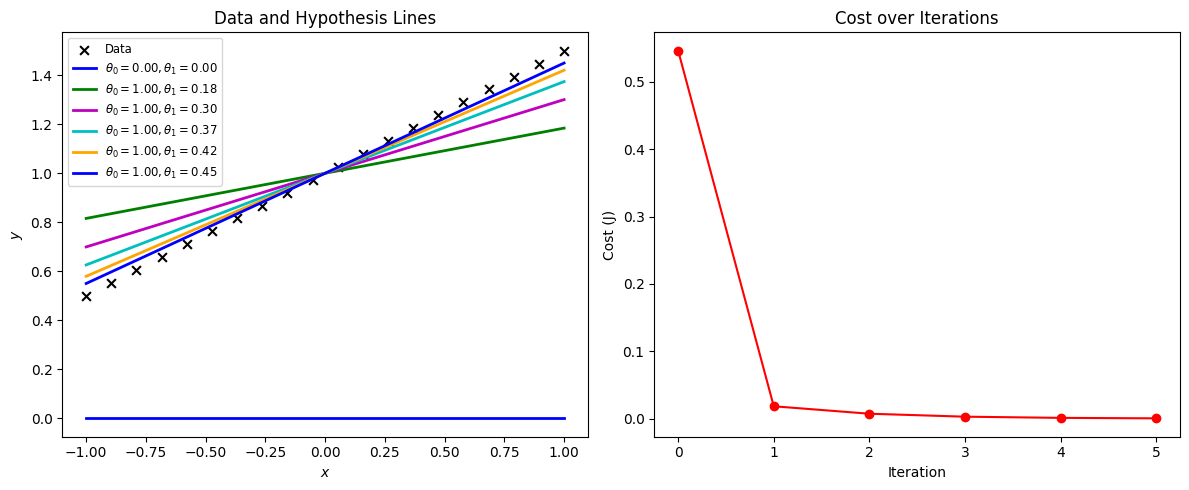

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# Left plot: Data with hypothesis lines
ax[0].scatter(x, y, marker='x', s=40, color='k', label='Data')

for j in range(iterations):
    ax[0].plot(x, hypothesis(x, theta0_history[j], theta1_history[j]), color=colors[j], lw=2,
               label=r'$\theta_0={:.2f}, \theta_1={:.2f}$'.format(theta0_history[j], theta1_history[j]))
    
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title("Data and Hypothesis Lines")
ax[0].legend(loc='upper left', fontsize='small')


ax[1].plot(range(iterations), cost_history, marker='o', color='r')
ax[1].set_title("Cost over Iterations")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Cost (J)")

plt.tight_layout()
plt.show()